# Proportion Plots

> A guide to plot proportion plot with binary data

- order: 3

In [ ]:
import dabest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Create dataset for demo

In [ ]:
def create_demo_prop_dataset(seed=9999, N=40):
    import numpy as np
    import pandas as pd

    np.random.seed(9999)  # Fix the seed so the results are replicable.
    # Create samples
    n = 1
    c1 = np.random.binomial(n, 0.2, size=N)
    c2 = np.random.binomial(n, 0.2, size=N)
    c3 = np.random.binomial(n, 0.8, size=N)

    t1 = np.random.binomial(n, 0.5, size=N)
    t2 = np.random.binomial(n, 0.2, size=N)
    t3 = np.random.binomial(n, 0.3, size=N)
    t4 = np.random.binomial(n, 0.4, size=N)
    t5 = np.random.binomial(n, 0.5, size=N)
    t6 = np.random.binomial(n, 0.6, size=N)

    # Add a `gender` column for coloring the data.
    females = np.repeat('Female', N / 2).tolist()
    males = np.repeat('Male', N / 2).tolist()
    gender = females + males

    # Add an `id` column for paired data plotting.
    id_col = pd.Series(range(1, N + 1))

    # Combine samples and gender into a DataFrame.
    df = pd.DataFrame({'Control 1': c1, 'Test 1': t1,
                       'Control 2': c2, 'Test 2': t2,
                       'Control 3': c3, 'Test 3': t3,
                       'Test 4': t4, 'Test 5': t5, 'Test 6': t6,
                       'Gender': gender, 'ID': id_col
                       })

    return df
df = create_demo_prop_dataset()

Only accept binary data consisting of 0 and 1.

In [ ]:
df.head()

,Control 1,Test 1,Control 2,Test 2,Control 3,Test 3,Test 4,Test 5,Test 6,Gender,ID
0,1,1,0,0,1,0,0,1,0,Female,1
1,0,0,0,1,1,1,0,0,0,Female,2
2,0,0,0,0,1,0,1,1,0,Female,3
3,0,0,0,0,1,0,0,1,0,Female,4
4,0,1,0,0,1,0,0,0,1,Female,5


You need to specify `proportional=True` for binary data.

In [ ]:
two_groups_unpaired = dabest.load(df, idx=("Control 1", "Test 1"), proportional=True)
two_groups_unpaired.mean_diff

DABEST v0.0.1
             
Good evening!
The current time is Sun Mar 12 00:59:39 2023.

DABEST v0.0.1
             
Good evening!
The current time is Sun Mar 12 00:59:39 2023.

The unpaired mean difference between Control 1 and Test 1 is 0.375 [95%CI 0.15, 0.525].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis ofzero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

## Effect sizes

Only two effect sizes are supported for binary data:

 - the mean difference (mean_diff)
 
 - [cohen's h(cohens_h)](https://en.wikipedia.org/wiki/Cohen%27s_h)

In [ ]:
two_groups_unpaired.mean_diff.results

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,pvalue_permutation,permutation_count,permutations_var,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney,proportional_difference
0,Control 1,Test 1,40,40,mean difference,None,0.375,95,0.15,0.525,...,0.0,5000,"[0.011266025641025641, 0.011266025641025641, 0...",0.000289,-3.81474,0.000271,-3.81474,0.000434,500.0,0.825418


In [ ]:
two_groups_unpaired.cohens_h.results

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,pvalue_permutation,permutation_count,permutations_var,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney,proportional_difference
0,Control 1,Test 1,40,40,Cohen's h,None,0.825418,95,0.329684,1.219937,...,0.0,5000,"[0.011266025641025641, 0.011266025641025641, 0...",0.000289,-3.81474,0.000271,-3.81474,0.000434,500.0,0.825418


## Producing estimation plots

C:\Users\zhang\anaconda3\lib\site-packages\dabest\plotter.py:724: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  control_group_summary = plot_data.groupby(xvar)\
C:\Users\zhang\anaconda3\lib\site-packages\dabest\plotter.py:726: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test_group_summary = plot_data.groupby(xvar)\


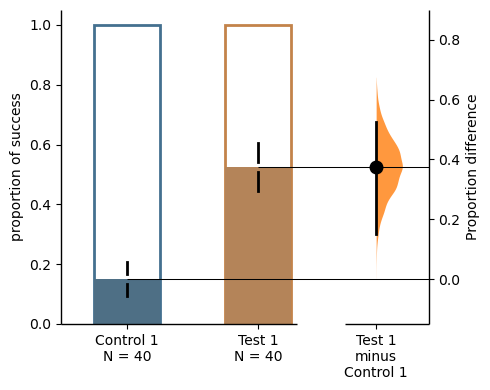

In [ ]:
two_groups_unpaired.mean_diff.plot();

C:\Users\zhang\anaconda3\lib\site-packages\dabest\plotter.py:724: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  control_group_summary = plot_data.groupby(xvar)\
C:\Users\zhang\anaconda3\lib\site-packages\dabest\plotter.py:726: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test_group_summary = plot_data.groupby(xvar)\


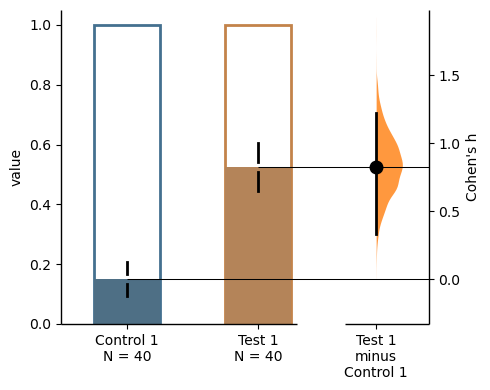

In [ ]:
two_groups_unpaired.cohens_h.plot();

The white part in the bar represents the proportion of observations in the dataset that do not belong to the category, which is 
equivalent to the proportion of 0 in the data. The colored part, on the other hand, represents the proportion of observations 
that belong to the category, which is equivalent to the proportion of 1 in the data. By default, the value of "group_summaries"
is set to "mean_sd". This means that the error bars in the plot display the mean and ± standard deviation of each group as 
gapped lines. The gap represents the mean, while the vertical ends represent the standard deviation. Alternatively, if the 
value of "group_summaries" is set to "median_quartiles", the median and 25th and 75th percentiles of each group are plotted instead. 
By default, the bootstrap effect sizes is plotted on the right axis.

Instead of a Gardner-Altman plot, you can produce a **Cumming estimation
plot** by setting ``float_contrast=False`` in the ``plot()`` method.
This will plot the bootstrap effect sizes below the raw data.

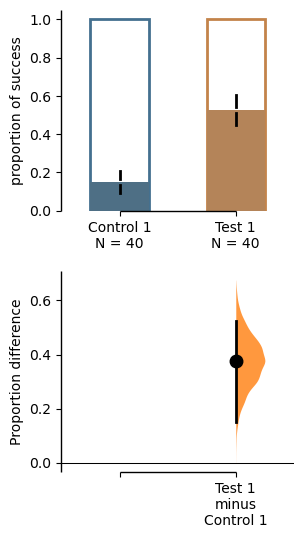

In [ ]:
two_groups_unpaired.mean_diff.plot(float_contrast=False);

## Producing Paired Proportion Plots

For paired version of proportional plot, we adapt the style of Sankey Diagram. The width of each bar in each xticks represent 
the proportion of corresponding label in the group, and the strip denotes the paired relationship for each observation.

Similar to the unpaired version, the ``.plot()`` method is used to produce a **Gardner-Altman estimation plot**, the only difference is that
the ``is_paired`` parameter is set to either ``baseline`` or  ``sequential`` when loading data.
